In [170]:
from fckan import FCKAN
from train import eval
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import pickle
import os
from matplotlib import pyplot as plt
import re

In [178]:
def filter_files(directory, extension):
    files = os.listdir(directory)
    filtered_files = [os.path.join(directory, file) for file in files if file.endswith(extension)]
    return sorted(filtered_files) 

path2testsets = filter_files('testset/', '.pt')  
path2weights = filter_files('weights/', '.pth')

for i in range(len(path2testsets)):
    print(path2testsets[i])
    print(path2weights[i]+'\n')

testset/ArrowHead.pt
weights/run_0_ArrowHead_n5_g5_k3_best_model.pth

testset/Beef.pt
weights/run_0_Beef_n5_g5_k3_best_model.pth

testset/Chinatown.pt
weights/run_0_Chinatown_n5_g5_k3_best_model.pth

testset/CricketX.pt
weights/run_0_CricketX_n5_g5_k3_best_model.pth

testset/CricketY.pt
weights/run_0_CricketY_n5_g5_k3_best_model.pth

testset/CricketZ.pt
weights/run_0_CricketZ_n5_g5_k3_best_model.pth

testset/ECG200.pt
weights/run_0_ECG200_n5_g5_k3_best_model.pth

testset/ItalyPowerDemand.pt
weights/run_0_ItalyPowerDemand_n5_g5_k3_best_model.pth



# Training Analysis

In [177]:
import re

filenames = [
    "run_1_STRING_n5_g5_k3_optimization.pkl",
    "run_453_ArrowHead_n5_g5_k3_optimization.pkl"
]

regex = r'run_\d+_([^_]+)_n\d+_g\d+_k\d+_optimization\.pkl'

for filename in filenames:
    match = re.match(regex, filename)
    if match:
        print(match.group(1))  

STRING
ArrowHead


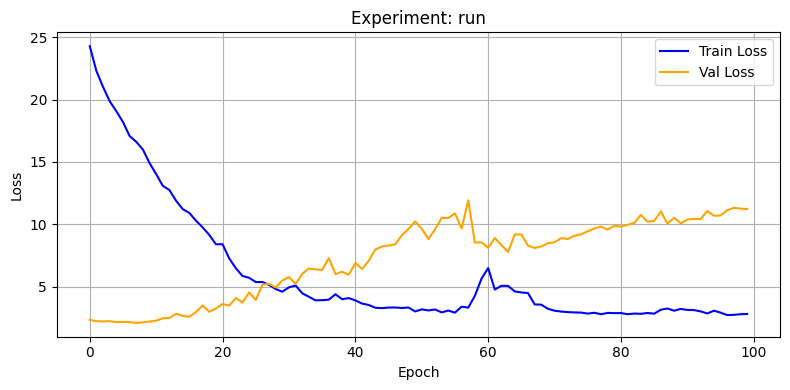

In [175]:
log_filenames = os.listdir('log/')
LOADS = {}

for filename in log_filenames:
    experiment_name = re.match(r'^[^_]+', filename).group()
    with open(f'log/{filename}', 'rb') as f:
        LOADS[experiment_name] = pickle.load(f)

for exp_name, values in LOADS.items():
    plt.figure(figsize=(8, 4))  
    plt.plot(values['train_loss'], label='Train Loss', color='blue')
    plt.plot(values['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Experiment: {exp_name}') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Test Results with Best Models

In [166]:
criterion = nn.CrossEntropyLoss()

In [179]:
results = {}
for testset_path, bestmodel_path in zip(path2testsets,path2weights):
    test_dataset = torch.load(testset_path, weights_only=False)
    test_loader = DataLoader(test_dataset, len(test_dataset), shuffle=False)
    _, labels = next(iter(test_loader))
    
    print(testset_path, bestmodel_path, len(torch.unique(labels)))
    model = FCKAN(n_classes=len(torch.unique(labels)),
                    rnd_state=42,
                    device='cuda').to(device='cuda')
    
    model.load_state_dict(torch.load(bestmodel_path, weights_only=False))
    model.eval()
    _, acc, f1 = eval(model, criterion, test_loader, device='cuda')

    results[testset_path] = (acc, f1)

testset/ArrowHead.pt weights/run_0_ArrowHead_n5_g5_k3_best_model.pth 3
checkpoint directory created: ./model
saving model version 0.0
testset/Beef.pt weights/run_0_Beef_n5_g5_k3_best_model.pth 5
checkpoint directory created: ./model
saving model version 0.0
testset/Chinatown.pt weights/run_0_Chinatown_n5_g5_k3_best_model.pth 2
checkpoint directory created: ./model
saving model version 0.0
testset/CricketX.pt weights/run_0_CricketX_n5_g5_k3_best_model.pth 12
checkpoint directory created: ./model
saving model version 0.0
testset/CricketY.pt weights/run_0_CricketY_n5_g5_k3_best_model.pth 12
checkpoint directory created: ./model
saving model version 0.0
testset/CricketZ.pt weights/run_0_CricketZ_n5_g5_k3_best_model.pth 12
checkpoint directory created: ./model
saving model version 0.0
testset/ECG200.pt weights/run_0_ECG200_n5_g5_k3_best_model.pth 2
checkpoint directory created: ./model
saving model version 0.0
testset/ItalyPowerDemand.pt weights/run_0_ItalyPowerDemand_n5_g5_k3_best_model.pt

In [180]:
for r in results:
    acc, f1 = results[r]
    print(f'{r}: acc={acc:.4f}, f1={f1:.4f}')

testset/ArrowHead.pt: acc=0.6914, f1=0.6972
testset/Beef.pt: acc=0.6667, f1=0.6544
testset/Chinatown.pt: acc=0.9534, f1=0.9538
testset/CricketX.pt: acc=0.2231, f1=0.1543
testset/CricketY.pt: acc=0.2513, f1=0.1734
testset/CricketZ.pt: acc=0.1949, f1=0.1367
testset/ECG200.pt: acc=0.8200, f1=0.8140
testset/ItalyPowerDemand.pt: acc=0.9524, f1=0.9524
